In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [2]:
fname = "https://raw.githubusercontent.com/Bio204-class/bio204-datasets/master/births.txt"
births = pd.read_table(fname)

In [3]:
births.head()

,fAge,mAge,weeks,premature,visits,gained,weight,sexBaby,smoke
0,31,30,39,full term,13,1,6.88,male,smoker
1,34,36,39,full term,5,35,7.69,male,nonsmoker
2,36,35,40,full term,12,29,8.88,male,nonsmoker
3,41,40,40,full term,13,30,9.00,female,nonsmoker
4,42,37,40,full term,NaN,10,7.94,male,nonsmoker


In [4]:
# get unique element from a given column
births.premature.unique()

array(['full term', 'premie'], dtype=object)

In [5]:
births.smoke.unique()

array(['smoker', 'nonsmoker'], dtype=object)

In [6]:
# total number of "null" (NA, NaN) elements in a given column
births.visits.isnull().sum()

1

In [7]:
# total number of null elements for each column
births.isnull().sum()

fAge         31
mAge          0
weeks         0
premature     0
visits        1
gained        2
weight        0
sexBaby       0
smoke         0
dtype: int64

In [8]:
# ispremie and isfullterm are boolean pandas.Series whose length is the number 
# of rows in births
ispremie = births.premature == "premie"
isfullterm = births.premature == "full term"

# can get number of Trues by summing boolean Series
nfullterm = isfullterm.sum()
npremie = ispremie.sum()

print("Full term births:", nfullterm)
print("Premature births:", npremie)

Full term births: 129
Premature births: 21


In [9]:
isgirl = births.sexBaby == "female"
isboy = births.sexBaby == "male"

# index into the birth DataFrame w/boolean Series, return new DataFrames
babyGirls = births[isgirl]
babyBoys = births[isboy]

print("Baby girls:", len(babyGirls))
print("Baby boys:", len(babyBoys))

Baby girls: 68
Baby boys: 82


In [10]:
# pandas.Series and numpy.array support bitwise and (&) and bitwise or (|) operators
premieGirls = births[isgirl & ispremie]
premieBoys = births[isboy & ispremie]

print("Premie girls:", len(premieGirls))
print("Premie boys:", len(premieBoys))

Premie girls: 8
Premie boys: 13


In [11]:
# use of bitwise or to get premature OR mother smoked
momsmoked = births.smoke == "smoker"
premieOrMomSmoked = births[ispremie | momsmoked]
print("Premie or Mom Smoked:", len(premieOrMomSmoked))

Premie or Mom Smoked: 63


In [12]:
# demonstrating bitwise operations on numpy arrays
a = np.array([True, False, True])
b = np.array([False, False, True])
print("a =", a)
print("b =", b)
print("bitwise and, a & b = ", a & b)
print("bitwise or, a | b = ", a | b)

a = [ True False  True]
b = [False False  True]
bitwise and, a & b =  [False False  True]
bitwise or, a | b =  [ True False  True]


## query

The `DataFrame.query` method provides another interface for querying the columns of a DataFrame with a Boolean expression.  It is convenient because it allows for more compact expressions.

In [13]:
premieAndSmoke = births.query('(premature == "premie") and (smoke == "smoker")')
premieAndSmoke

,fAge,mAge,weeks,premature,visits,gained,weight,sexBaby,smoke
7,28,21,35,premie,9,15,5.50,female,smoker
8,22,20,32,premie,5,40,2.69,male,smoker
18,28,27,33,premie,6,18,4.75,male,smoker
21,NaN,38,32,premie,10,16,2.19,female,smoker
46,30,25,35,premie,15,40,4.50,male,smoker
66,29,31,36,premie,8,42,5.94,male,smoker
125,NaN,18,33,premie,7,40,1.69,male,smoker
127,37,33,36,premie,11,15,6.31,male,smoker


## groupby

The `DataFrame.groupby` method provides a convenient way to collapse data over categorical variables and create summary analyses.

In [14]:
termgroup = births.groupby("premature")

In [15]:
# apply an summary function w/respect to the grouping
termgroup.describe()

fAge      gained        mAge      visits       weeks  \
premature                                                                     
full term count  104.000000  127.000000  129.000000  128.000000  129.000000   
          mean    29.961538   33.755906   26.534884   11.875000   39.403101   
          std      6.154836   15.531696    5.962181    3.452718    1.518219   
          min     17.000000    0.000000   15.000000    3.000000   37.000000   
          25%     25.000000   24.500000   22.000000   10.000000   38.000000   
          50%     30.000000   32.000000   26.000000   12.000000   39.000000   
          75%     34.000000   40.000000   31.000000   15.000000   40.000000   
          max     47.000000   85.000000   40.000000   19.000000   44.000000   
premie    count   15.000000   21.000000   21.000000   21.000000   21.000000   
          mean    28.533333   24.571429   27.000000    9.238095   33.285714   
          std      6.151268   14.358173    7.797435    3.973723    2.777460   
          min     17.000000    0.000000   17.000000    2.000000   26.000000   
          25%     26.000000   15.000000   21.000000    6.000000   32.000000   
          50%     28.000000   23.000000   25.000000   10.000000   34.000000   
          75%     33.000000   32.000000   33.000000   13.000000   35.000000   
          max     38.000000   60.000000   41.000000   15.000000   36.000000   

                     weight  
premature                    
full term count  129.000000  
          mean     7.426357  
          std      1.033136  
          min      3.750000  
          25%      6.880000  
          50%      7.500000  
          75%      8.130000  
          max     10.130000  
premie    count   21.000000  
          mean     4.709524  
          std      1.789926  
          min      1.630000  
          25%      3.630000  
          50%      4.750000  
          75%      5.940000  
          max      7.810000

In [16]:
type(termgroup)

pandas.core.groupby.DataFrameGroupBy

In [17]:
# the groupby object has a groups dictionary associated with it
type(termgroup.groups)

dict

In [18]:
# the keys of this dictionary are the actual grouping terms
termgroup.groups.keys()

dict_keys(['full term', 'premie'])

In [19]:
# get a specific group
premies = termgroup.get_group('premie')
type(premies),premies.shape

(pandas.core.frame.DataFrame, (21, 8))

### Grouping on multiple variables simultaneously

In [20]:
term_and_smoke_group = births.groupby(["premature", "smoke"])

In [21]:
term_and_smoke_group.groups.keys()

dict_keys([('premie', 'nonsmoker'), ('full term', 'smoker'), ('premie', 'smoker'), ('full term', 'nonsmoker')])

In [22]:
term_and_smoke_group.weight.describe()

premature  smoke           
full term  nonsmoker  count    87.000000
                      mean      7.501379
                      std       1.055419
                      min       3.750000
                      25%       6.880000
                      50%       7.500000
                      75%       8.160000
                      max      10.130000
           smoker     count    42.000000
                      mean      7.270952
                      std       0.979337
                      min       5.000000
                      25%       6.562500
                      50%       7.310000
                      75%       7.985000
                      max       9.130000
premie     nonsmoker  count    13.000000
                      mean      5.025385
                      std       1.790943
                      min       1.630000
                      25%       3.750000
                      50%       5.060000
                      75%       6.500000
                      max    

# Matplotlib: an object oriented approach

Up to now we've been mostly using what is a "function based" approach to Matlotlib, where we build up a plot by a series of function calls.  This works pretty well, but starts to break down when we want to create more complicated plots.  There's another way to approach plot-building in Matplotlib, built around manipulation of `figure` and `axis` objects.  I demonstrate these two styles of plot-building below.

### Function based approach to Matplotlib
Here's an example of the "function based" approach. Notice that we call four functions in succession: `scatter`, `xlabel`, `ylabel`, and `title`.

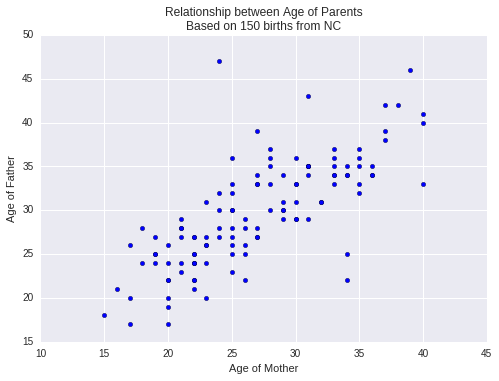

In [23]:
plt.scatter(births.mAge, births.fAge)
plt.xlabel("Age of Mother")
plt.ylabel("Age of Father")
plt.title("Relationship between Age of Parents\nBased on 150 births from NC")
pass

### Object oriented approach to Matplotlib

Here's the same plot, created using an object oriented approach.  I build it up step by step so you can see that the figure and axis objects stand on their own.

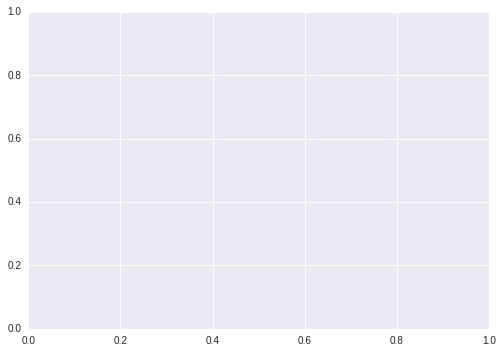

In [24]:
# create just the figure and axis objects
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height

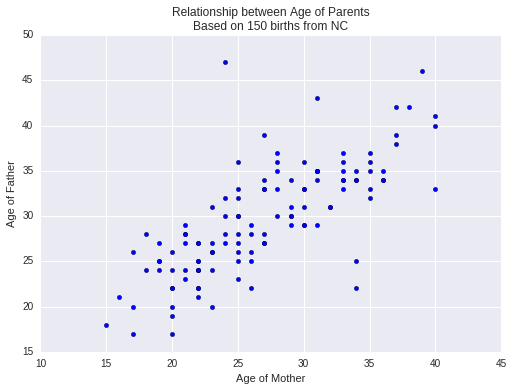

In [25]:
# create our figure and axis objects
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height

# change/add features of axis
axes.scatter(births.mAge, births.fAge)
axes.set_xlabel("Age of Mother")
axes.set_ylabel("Age of Father")
axes.set_title("Relationship between Age of Parents\nBased on 150 births from NC")

pass

### Creating a new visualization

Above we recreated the scatter plot using the object oriented approach, but the code was somewhat more verbose. However, the object oriented approach really starts to shine when we want to start tweaking the figure and adding new elements.  Here I'll recreate the scatter plot and then add two new axes, depicting the marginal histograms on the top and right side.

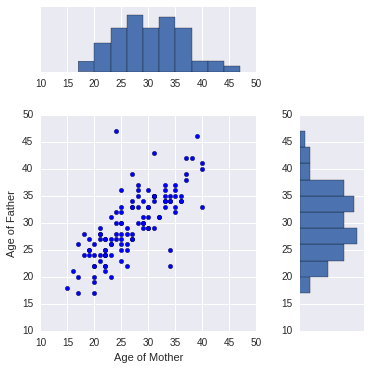

In [26]:
# create our figure and axis objects
fig = plt.figure(figsize=(6,6))

# note that we've made the main axis take up less of the total figure 
axes = fig.add_axes([0.1, 0.1, 0.5, 0.5]) # left, bottom, width, height

# change/add features of axis
axes.scatter(births.mAge, births.fAge)
axes.set_xlabel("Age of Mother")
axes.set_ylabel("Age of Father")
axes.set_xlim(10,50)
axes.set_ylim(10,50)

# add new axis on right of figure to draw histogram of father's age
# I figured these out the  coordinates and width by sketching and trial and error
right = fig.add_axes([0.7, 0.1, 0.15, 0.5])  
right.hist(births.fAge[births.fAge.notnull()], orientation="horizontal", normed=True)
right.set_xticks([])
right.set_ylim(10,50)  # for figure to be accurate, these limits must match main figure limits

# add new axis on top of figure to draw histogram of mother's age
above = fig.add_axes([0.1, 0.7, 0.5, 0.15])
above.hist(births.fAge[births.fAge.notnull()], orientation="vertical", normed=True)
above.set_yticks([])
above.set_xlim(10,50)

pass

### More on the Matplotlib object oriented approach

For more details and a longer exposition of this object oriented approach to matplotlib see this [tutorial by J. R. Johannson](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb).

## Seaborn: A statistical data visualization library

In [27]:
import seaborn as sbn

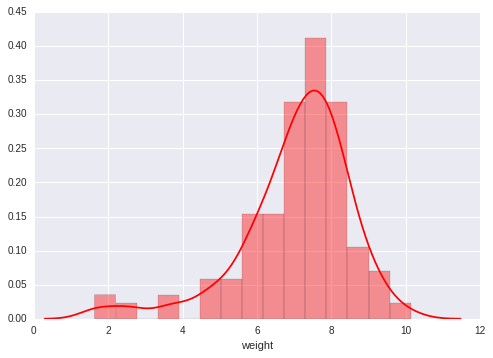

In [28]:
sbn.distplot(births.weight, color='r')
pass

### Density plots

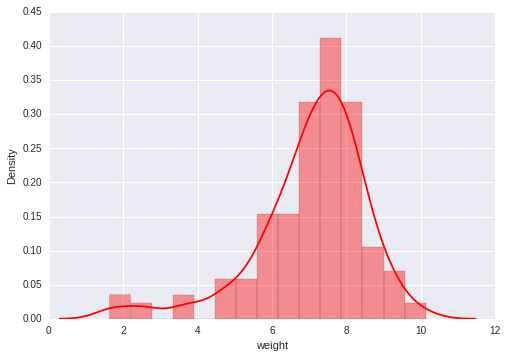

In [29]:
# Plot a histogram with a kernel density estimate (kde)
ax = sns.distplot(births.weight, color="r")
ax.set_ylabel("Density")
pass

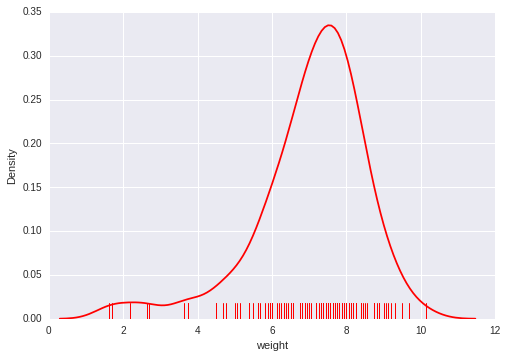

In [30]:
# Plot a kde with a rug plot
ax = sns.distplot(births.weight, hist=False, rug=True, color="r")
ax.set_ylabel("Density")
pass

Kernel Density Estimates have a parameter called "band-width" which controls the degree of smoothing.

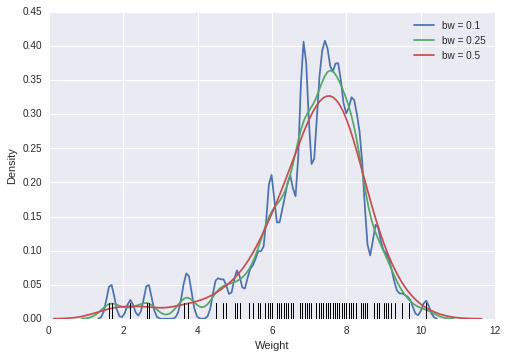

In [31]:
sns.kdeplot(births.weight, bw=0.1, label='bw = 0.1')
sns.kdeplot(births.weight, bw=0.25, label='bw = 0.25')
sns.kdeplot(births.weight, bw=0.5, label='bw = 0.5')
sns.rugplot(births.weight, color='black')
plt.xlabel("Weight")
plt.ylabel("Density")
pass

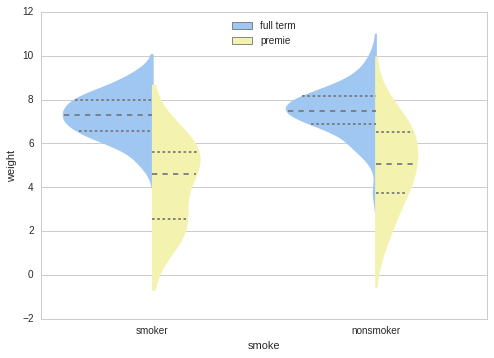

In [34]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="smoke", y="weight", hue="premature", data=births, split=True,
               inner='quartile',
               palette={"full term": "b", "premie": "y"})
plt.legend(loc='upper center')
pass